# Damage Paramatrization and Visualization

Author: Ian Viotti, 2022

## Import Modules

For simplification purposes, it was created an additional module `cluster_aux_fun` with the functions created for this notebook 
>the .py file must be placed in this same directory for correct importing

In [1]:
import cluster_aux_fun_core as caf

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Damage definition

In this work, the skin and interface damage was modeled having an elliptical geometry having the following variable vector:

$var_{dam} = \{pos_x, pos_y, pos_z, \theta_y, \theta_z, c, r\} $

in wich $c$ is the length of the ellipsis and $r$ the ratio for width and length.

## Plot damage using Shapely

For making easier dealing with geometry plotting, it was used Shapely package. 

> Note that it's not native to anaconda distribution package, so it must be installed using `pip install shapely`.

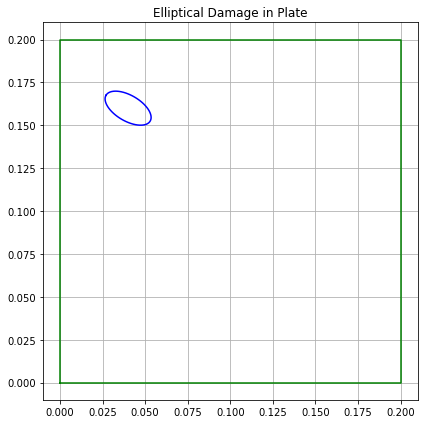

In [2]:
plate_x, plate_y = 0.2, 0.2 # Plate size

pos_x = 0.04
pos_y = 0.16
pos_z = 0.0125
theta_z = 150 # [°]
theta_y = 10
c = 0.03
r = 0.5
dam_var = (pos_x, pos_y, theta_z, c, r)

caf.plot_damage(dam_var)

# Generates variables database for cluster

Here we define the number of models to create by defining an integer value to `cluster_size` and the min and max bounds for each variable.

A few notes can be taken regarding the variable bounds:

- Bounds were defined in tuples.
- Position or length bounds cannot be altered independently so it doesn't creates damage outside of the plate region.
- $\theta$ bounds are defined so we have ellipsis pointing in all directions
- The ratio bounds were defined so we have between 20% (thin) and 100% (circle) damages.

The variables database was created by calling `rand_data()` that uses `numpy.random.random()` to create randon values between variable limits.

It was also generated a number between 1 and 4 and vstacked to `var_data` to represent the number of the damaged ply.

In [6]:
cluster_size = 1000

bounds_pos_x = (0.04, 0.16) 
bounds_pos_y = (0.04, 0.16)
bounds_pos_z = (0.0060, 0.00650)
bounds_theta_y = (-7.5, 7.5)
bounds_theta_z = (0, 180)
bounds_c = (0.015, 0.03)
bounds_r = (0.2, 0.35)

var_name = ('pos_x [m]', 'pos_y [m]', 'theta_z [°]', 'c [m]', 'r [m/m]', 'pos_z [m]', 'theta_y [°]')
var_bounds = (bounds_pos_x, bounds_pos_y, bounds_theta_z, bounds_c, bounds_r, bounds_pos_z, bounds_theta_y)
var_data = caf.rand_data(var_bounds, cluster_size)

Simple loop for plotting all defined damage models 
> It's recommended to disable this if the cluster size is too great.

> The red rectangle represents the max bounds for the position of the center of the ellipsis.

In [ ]:
for i in range(len(var_data.T)):
    caf.plot_damage(var_data.T[i], min_bounds = bounds_pos_x[0], max_bounds = bounds_pos_y[1])

## Dataframe for managing variable data

This was done by using `Pandas` dataframe so it makes easier to visualize a large number of data.

In [5]:
var_dict = dict(zip(var_name,[i for i in var_data]))
df = pd.DataFrame(var_dict).reset_index()
df

,index,pos_x [m],pos_y [m],theta_z [°],c [m],r [m/m],pos_z [m],theta_y [°]
0,0,0.151608,0.114253,58.275822,0.020518,0.248180,0.006203,-2.359071
1,1,0.069833,0.144387,39.184078,0.017006,0.273303,0.006037,-4.932051
2,2,0.065990,0.122806,111.372160,0.025074,0.336751,0.006236,6.841738
3,3,0.041816,0.147468,111.209867,0.017666,0.338547,0.006408,-5.625194
4,4,0.147302,0.119131,74.001383,0.015212,0.236918,0.006452,-1.641646
...,...,...,...,...,...,...,...,...
9995,9995,0.067896,0.104456,131.564572,0.023030,0.331372,0.006064,-3.085508
9996,9996,0.083671,0.041615,51.521717,0.019568,0.265612,0.006183,-2.971276
9997,9997,0.120779,0.129980,153.131961,0.019771,0.235201,0.006289,-1.195677
9998,9998,0.143371,0.114567,162.773480,0.025968,0.222821,0.006372,4.639548


In [7]:
import seaborn as sns

<AxesSubplot:xlabel='index', ylabel='r [m/m]'>

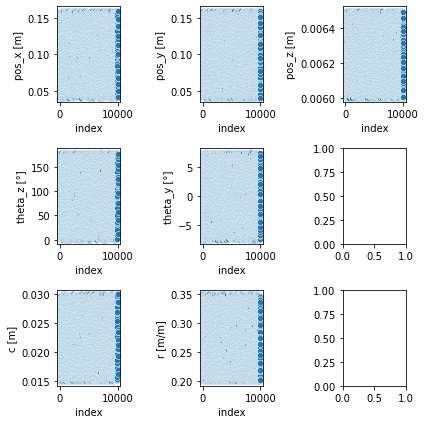

In [38]:
fig, axs = plt.subplots(3, 3, figzise=)
sns.scatterplot(x='index', y='pos_x [m]', data=df, ax=axs[0][0])
sns.scatterplot(x='index', y='pos_y [m]', data=df, ax=axs[0][1])
sns.scatterplot(x='index', y='pos_z [m]', data=df, ax=axs[0][2])
sns.scatterplot(x='index', y='theta_z [°]', data=df, ax=axs[1][0])
sns.scatterplot(x='index', y='theta_y [°]', data=df, ax=axs[1][1])
sns.scatterplot(x='index', y='c [m]', data=df, ax=axs[2][0])
sns.scatterplot(x='index', y='r [m/m]', data=df, ax=axs[2][1])


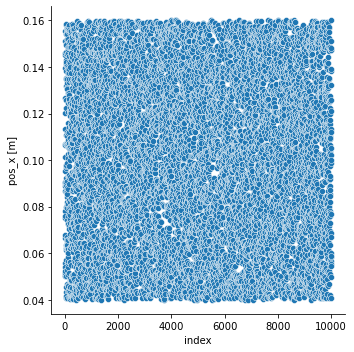

In [12]:
sns.relplot(
    data = df,
    kind = 'scatter',
    x = 'index',
    y = 'pos_x [m]',
    col = 'region',
)

Simple scatter plotting for visaulizing randomness in variables dataframe.

Writing a .csv file with all damage variables 

In [12]:
df.to_csv('core_damage_variables.csv')